# Keras and Tensorflow

In [1]:
import numpy as np
import shutil
import os
import tensorflow as tf
print(tf.__version__)

2021-12-29 07:57:21.102552: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-29 07:57:21.102592: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.7.0


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_test = x_test / 255.0
x_train = x_train / 255

y_train = tf.keras.utils.to_categorical(y = y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y = y_test, num_classes = 10)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000, seed=42).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)


2021-12-29 07:57:24.238521: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-29 07:57:24.238574: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-29 07:57:24.238619: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu-4gb-nbg1-development-server): /proc/driver/nvidia/version does not exist
2021-12-29 07:57:24.239322: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-29 07:57:24.240212: W tensorflow/core/framework/cpu_allocator_impl.cc:82

In [4]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=10, activation='softmax')
    ]
)

In [5]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ["categorical_accuracy"]
)

history = model.fit(x_train, y_train, epochs=10)

2021-12-29 07:57:25.231957: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4699 - categorical_accuracy: 0.8764
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - categorical_accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - categorical_accuracy: 0.9211
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - categorical_accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - categorical_accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2622 - categorical_accuracy: 0.9277
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - categorical_accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2557 - categorical_accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2529 - cat

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2655 - categorical_accuracy: 0.9281


[0.26551058888435364, 0.9280999898910522]

In [7]:
v = np.argmax(model.predict(x_test), axis=1)
y = np.argmax(y_test, axis=1)

print(np.sum(v != y), "/", len(v))

719 / 10000


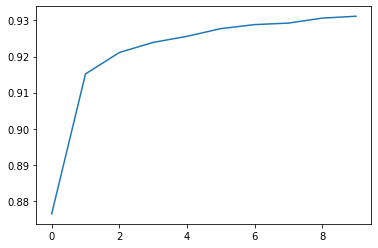

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])

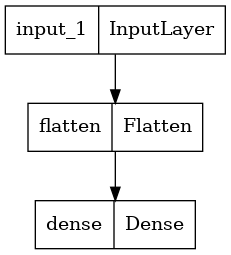

In [9]:
tf.keras.utils.plot_model(model)